In [1]:
with open('datasets/dbpedia/train.txt', 'r') as fin:
    lines = fin.readlines()

In [2]:
lines[:10]

['E. D. Abbott Ltd. Abbott of Farnham E D Abbott Limited was a British coachbuilding business based in Farnham Surrey trading under that name from 1929. A major part of their output was under sub-contract to motor vehicle manufacturers. Their business closed in 1972.\n',
 "Schwan-Stabilo. Schwan-STABILO is a German maker of pens for writing colouring and cosmetics as well as markers and highlighters for office use. It is the world's largest manufacturer of highlighter pens Stabilo Boss.\n",
 'Q-workshop. Q-workshop is a Polish company located in Poznań that specializes in designand production of polyhedral dice and dice accessories for use in various games ( role-playing gamesboard games and tabletop wargames ) . They also run an online retail store and maintainan active forum community.Q-workshop was established in 2001 by Patryk Strzelewicz – a student from Poznań. Initiallythe company sold its products via online auction services but in 2005 a website and online store wereestablishe

In [35]:
lens = [len(i) for i in lines]
np.min(lens), np.mean(lens), np.max(lens)

(13, 304.2436517857143, 13587)

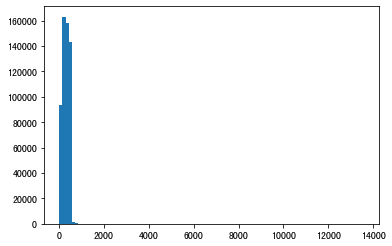

In [39]:
import matplotlib.pyplot as plt
bar = plt.hist(lens, bins=100)

In [4]:
with open('datasets/dbpedia/train_labels.txt', 'r') as fin:
    labels = [item.replace('\n', '') for item in fin.readlines()]

In [6]:
labels = [int(i) for i in labels]

In [10]:
villages = [lines[i] for i, lbl in enumerate(labels) if lbl == 8]
print(len(villages))
villages[:20]

40000


['Shirvan Shahlu. Shirvan Shahlu ( Persian: شيروان شاهلو\u200e also Romanized as Shīrvān Shāhlū; also known as Shīravān Shāmnū ) is a village in Gavdul-e Sharqi Rural District in the Central District of Malekan County East Azerbaijan Province Iran. At the 2006 census its population was 137 in 35 families.\n',
 'Chayly. Chayly is a village in the Qabala Rayon of Azerbaijan.It is suspected that this village has undergone a name change or no longer exists as no Azerbaijani website mentions it under this name.\n',
 'Gavdar. Gavdar ( Persian: گاودار\u200e also Romanized as Gāvdār ) is a village in Liravi-ye Jonubi Rural District Imam Hassan District Deylam County Bushehr Province Iran. At the 2006 census its population was 81 in 14 families.\n',
 'Piskarki. Piskarki [pisˈkarki] is a village in the administrative district of Gmina Jeżewo within Świecie County Kuyavian-Pomeranian Voivodeship in north-central Poland.The village has a population of 135.\n',
 'Gustawów Gmina Fałków. Gustawów [ɡu

In [21]:
len('Shirvan Shahlu. Shirvan Shahlu ( Persian: شيروان شاهلو\u200e also Romanized as Shīrvān Shāhlū; also known as Shīravān Shāmnū ) is a village in Gavdul-e Sharqi Rural District in the Central District of Malekan County East Azerbaijan Province Iran. At the 2006 census its population was 137 in 35 families.\n',
 )

300

In [67]:
import torch

ids_dic = torch.load('/chj/dev/lianxiaolei/LOTClass/datasets/dbpedia/category_vocab.pt.bak_l')

In [14]:
from transformers import BertTokenizer

tker = BertTokenizer.from_pretrained('bert-base-uncased')

In [69]:
dic = {k: tker.convert_ids_to_tokens(v) for k, v in ids_dic.items()}

In [70]:
dic[8]

['village',
 'villages',
 'settlement',
 'town',
 'east',
 'population',
 'rural',
 'municipality',
 'parish',
 'na',
 'temple',
 'pa',
 'commune',
 'pre',
 'ha',
 'north',
 'hamlet',
 'settlements',
 'chamber',
 'administrative',
 'neighbourhood',
 'township',
 'lies',
 'camp',
 'locality',
 'os',
 'villagers',
 'iran',
 'nest',
 'se',
 'neighborhood',
 'living',
 'daily',
 'junction',
 'palace',
 'county',
 'crossing',
 'south',
 'approximately',
 'garde',
 'market',
 'il',
 'far',
 'reared',
 'romanized',
 'non',
 'west',
 'right',
 'court',
 'wa',
 'km',
 'hen']

In [71]:
with open('dbpedia_lotclass_dic.pkl', 'wb') as fout:
    pkl.dump(dic, fout)

In [61]:
import nltk
from tqdm import tqdm
from itertools import chain
from nltk.tokenize import word_tokenize
text = ['Gustawów Gmina Fałków. Gustawów [ɡusˈtavuf] is a village located in the administrative district of Gmina Fałków within Końskie County Świętokrzyskie Voivodeship in south-central Poland. It lies approximately 10 kilometres ( 6 mi ) south-west of Fałków 33 km ( 21 mi ) south-west of Końskie and 50 km ( 31 mi ) north-west of the regional capital Kielce.The village has a population of 160.\n']


In [45]:
# tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# text = [tokenizer.tokenize(item) for item in tqdm(text)]

# text = list(chain.from_iterable(text))

In [46]:
text

['Gustawów Gmina Fałków. Gustawów [ɡusˈtavuf] is a village in the administrative district of Gmina Fałków within Końskie County Świętokrzyskie Voivodeship in south-central Poland. It lies approximately 10 kilometres ( 6 mi ) south-west of Fałków 33 km ( 21 mi ) south-west of Końskie and 50 km ( 31 mi ) north-west of the regional capital Kielce.The village has a population of 160.\n']

In [62]:
import re
text = [re.sub(r'[^\w\s]',' ', item) for item in tqdm(text)]

100%|██████████| 1/1 [00:00<00:00, 12520.31it/s]


In [63]:
text

['Gustawów Gmina Fałków  Gustawów  ɡusˈtavuf  is a village located in the administrative district of Gmina Fałków within Końskie County Świętokrzyskie Voivodeship in south central Poland  It lies approximately 10 kilometres   6 mi   south west of Fałków 33 km   21 mi   south west of Końskie and 50 km   31 mi   north west of the regional capital Kielce The village has a population of 160 \n']

In [64]:
tokens = word_tokenize(text[0])
pos_tags = nltk.pos_tag(tokens)
pos_tags

[('Gustawów', 'NNP'),
 ('Gmina', 'NNP'),
 ('Fałków', 'NNP'),
 ('Gustawów', 'NNP'),
 ('ɡusˈtavuf', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('village', 'NN'),
 ('located', 'VBN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('administrative', 'JJ'),
 ('district', 'NN'),
 ('of', 'IN'),
 ('Gmina', 'NNP'),
 ('Fałków', 'NNP'),
 ('within', 'IN'),
 ('Końskie', 'NNP'),
 ('County', 'NNP'),
 ('Świętokrzyskie', 'NNP'),
 ('Voivodeship', 'NNP'),
 ('in', 'IN'),
 ('south', 'JJ'),
 ('central', 'JJ'),
 ('Poland', 'NNP'),
 ('It', 'PRP'),
 ('lies', 'VBZ'),
 ('approximately', 'RB'),
 ('10', 'CD'),
 ('kilometres', 'NNS'),
 ('6', 'CD'),
 ('mi', 'NNS'),
 ('south', 'JJ'),
 ('west', 'JJS'),
 ('of', 'IN'),
 ('Fałków', 'NNP'),
 ('33', 'CD'),
 ('km', 'VBD'),
 ('21', 'CD'),
 ('mi', 'NN'),
 ('south', 'JJ'),
 ('west', 'NN'),
 ('of', 'IN'),
 ('Końskie', 'NNP'),
 ('and', 'CC'),
 ('50', 'CD'),
 ('km', 'NNS'),
 ('31', 'CD'),
 ('mi', 'JJ'),
 ('north', 'JJ'),
 ('west', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('regional', 'JJ'),
 ('capit

In [54]:
def is_en(s):
    for uchar in s:
        if ( uchar >= u'\u0041' and uchar <= u'\u005A' ) or ( uchar >= u'\u0061' and uchar <= u'\u007A'):
            continue
        else:
            return False
    return True


def get_nouns(x):
    nouns = []
    for t in tqdm(x):
        tokens = word_tokenize(t)
#         tokens = tweet.tokenize(t)
        pos_tags = nltk.pos_tag(tokens)

        noun = set()
        for word, pos in pos_tags:
            word = word.lower()
            if len(word) > 30 or len(word) < 3: continue
#             if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS' ) \
            if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS' or pos == 'VBN' or pos == 'JJ' or pos == 'JJS') \
            and is_en(word):
                noun.add(word)
#                 noun.add(wnl.lemmatize(word.lower()))
        nouns.append(list(noun))

    return nouns

get_nouns(text)


100%|██████████| 1/1 [00:00<00:00, 298.57it/s]


[['voivodeship',
  'capital',
  'village',
  'north',
  'kilometres',
  'kielce',
  'county',
  'poland',
  'district',
  'administrative',
  'regional',
  'gmina',
  'population',
  'central',
  'south',
  'west']]

In [56]:
import pickle as pkl
with open('nouns.pkl', 'rb') as fin:
    data = pkl.load(fin)

  0%|          | 0/1 [26:05<?, ?it/s]


In [58]:
data[:10]

[['manufacturers',
  'british',
  'name',
  'limited',
  'coachbuilding',
  'business',
  'vehicle',
  'ltd',
  'part',
  'surrey',
  'output',
  'sub',
  'based',
  'contract'],
 ['markers',
  'manufacturer',
  'highlighters',
  'highlighter',
  'largest',
  'use',
  'office',
  'cosmetics',
  'pens',
  'stabilo',
  'colouring'],
 ['student',
  'designand',
  'games',
  'role',
  'patryk',
  'products',
  'use',
  'located',
  'strzelewicz',
  'active',
  'various',
  'forum',
  'wargames',
  'company',
  'production',
  'gamesboard',
  'accessories',
  'polish',
  'initiallythe',
  'auction',
  'website',
  'retail',
  'workshop',
  'polyhedral',
  'services',
  'established',
  'online',
  'tabletop',
  'community'],
 ['radlan',
  'subsidiary',
  'software',
  'computer',
  'group',
  'solutions',
  'communications',
  'marvell',
  'area',
  'limited',
  'network',
  'technologies',
  'technology',
  'local',
  'known',
  'owned'],
 ['printed',
  'careers',
  'guide',
  'contacts',
